## Unsupervised Learning Algorithms

### Script Content Structure:

### 1. Import libraries and data
### 2. Data Wrangling and Scaling
### 3. Dendrograms
### 4. Insights
### 5. Principal Component Analysis (PCA)

## 1. Import Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# Define directory path
path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Machine Learning Specialization Course\Achievement 1\Data Sets'

In [5]:
climate =pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [7]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [9]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB


In [11]:
climate.shape

(22950, 170)

In [13]:
# Import the pleasant weather data
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [15]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
pleasantweather.shape

(22950, 16)

## 2. Data Wrangling and Scaling

### Reduce the dataset 2020

In [21]:
#Reducing dataset to 2020
climate2020 = climate[climate['DATE'].astype(str).str.contains('2020')] #<-----INSERT YEAR HERE
climate2020

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
762,19620201,2,8,2.1,0.75,1.0180,0.25,0.42,0,0.0,...,6,0.75,1.0328,0.64,0.25,0,3.6,7.1,4.9,9.3
763,19620202,2,7,2.1,0.84,1.0180,0.44,0.11,3,0.7,...,8,0.89,1.0319,0.23,0.31,0,0.0,8.4,6.1,10.5
764,19620203,2,7,2.1,0.83,1.0180,0.64,0.00,2,2.4,...,7,0.86,1.0243,0.43,0.30,0,0.7,8.8,6.5,10.9
765,19620204,2,8,2.1,0.88,1.0180,0.26,0.16,2,0.0,...,8,0.88,1.0177,0.20,0.21,0,0.0,9.2,6.7,11.8
766,19620205,2,6,2.1,0.76,1.0180,0.33,0.01,1,0.1,...,7,0.78,1.0227,0.33,0.19,0,0.0,9.6,7.8,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22681,20220205,2,3,2.1,0.72,1.0271,0.99,0.00,0,7.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22682,20220206,2,8,2.1,0.64,1.0200,0.31,0.59,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22683,20220207,2,2,2.1,0.65,1.0275,0.94,0.00,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22684,20220208,2,2,2.1,0.62,1.0349,1.19,0.00,0,8.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [23]:
# Scaling climate2020 for ML
scaler = StandardScaler()

In [25]:
scaled_2020= pd.DataFrame(scaler.fit_transform(climate2020))

In [27]:
scaled_2020.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-4.299921,-1.079955,1.233924,-0.016609,0.254482,-0.110544,-1.066261,0.683224,-0.164936,-1.130323,...,1.357631,-3.565821,3.641242,-1.531766,-0.883780,0.0,0.515246,-4.019753,-2.954667,-4.010961
1,-4.299913,-1.079955,0.836511,-0.016609,0.919718,-0.110544,-0.848886,-0.177456,1.876143,-0.979120,...,4.593317,3.417003,3.469935,-3.120154,-0.588958,0.0,-3.912944,-2.466388,-1.696759,-2.774602
2,-4.299905,-1.079955,0.836511,-0.016609,0.845803,-0.110544,-0.620070,-0.482858,1.195783,-0.611912,...,2.975474,1.920684,2.023341,-2.345331,-0.638095,0.0,-3.051907,-1.988430,-1.277456,-2.362483
3,-4.299897,-1.079955,1.233924,-0.016609,1.215378,-0.110544,-1.054820,-0.038636,1.195783,-1.130323,...,4.593317,2.918230,0.767089,-3.236378,-1.080329,0.0,-3.912944,-1.510471,-1.067805,-1.435214
4,-4.299889,-1.079955,0.439099,-0.016609,0.328397,-0.110544,-0.974734,-0.455094,0.515424,-1.108723,...,2.975474,-2.069502,1.718795,-2.732743,-1.178603,0.0,-3.912944,-1.032513,0.085278,-2.053393


In [29]:
scaled_2020.shape

(429, 170)

In [31]:
#Copy the column headers from the original temp dataset and paste them into the scaled dataset.

columns=climate2020.columns.values.tolist() #create a list of column names for the df
columns #list the columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [33]:
scaled_2020.columns = columns
columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

## 3. Dendrogram

In [36]:
# For each station, we include 10 common weather features to ensure a fair comparison

columns_to_use = [
    # OSLO features
     'OSLO_cloud_cover',
     'OSLO_wind_speed',
     'OSLO_humidity',
     'OSLO_pressure',
     'OSLO_global_radiation',
     'OSLO_precipitation',
     'OSLO_snow_depth',
     'OSLO_sunshine',
     'OSLO_temp_mean',
     'OSLO_temp_min',
     'OSLO_temp_max',
    
    # VALENTIA features
     'VALENTIA_cloud_cover',
     'VALENTIA_humidity',
     'VALENTIA_pressure',
     'VALENTIA_global_radiation',
     'VALENTIA_precipitation',
     'VALENTIA_snow_depth',
     'VALENTIA_sunshine',
     'VALENTIA_temp_mean',
     'VALENTIA_temp_min',
     'VALENTIA_temp_max',
]   # Extract the selected columns from the scaled dataset

X = scaled_2020[columns_to_use]   # This 'X' DataFrame will be used for generating the dendrogram

### Single Method: (This measures the distance between the two nearest members of each cluster to decide which group they should be in)

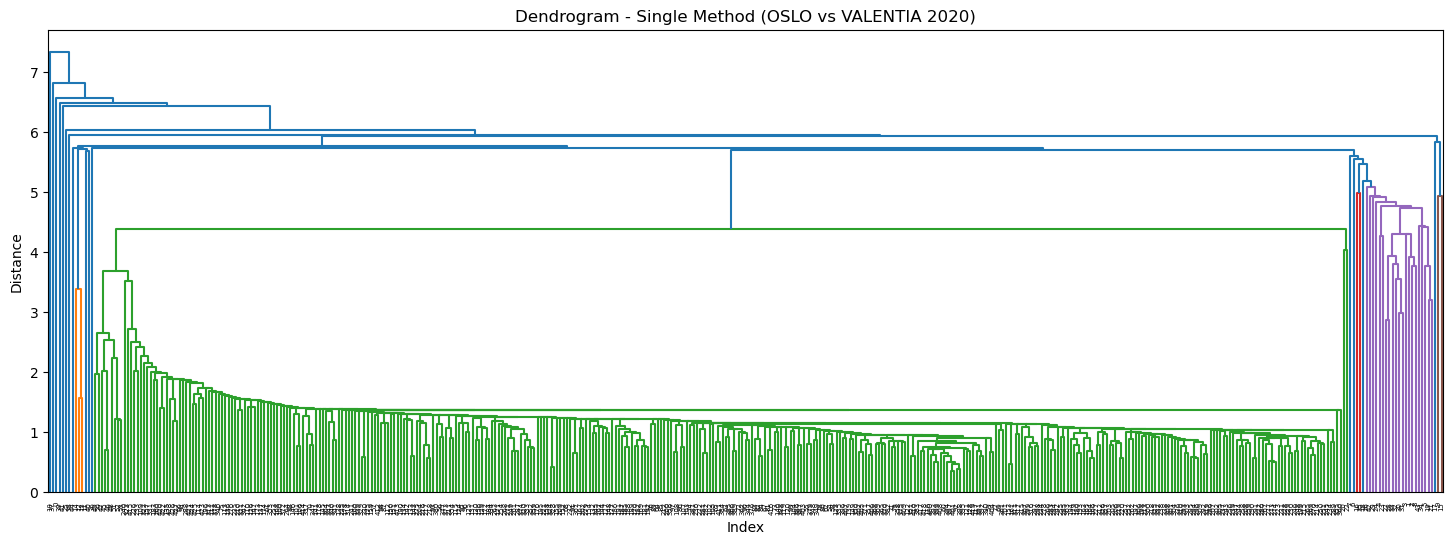

In [39]:
distance = linkage(X, method='single')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Single Method (OSLO vs VALENTIA 2020)")

# Display the dendrogram
plt.show()

## Complete Method: (This measures the distance between the two most distant members of each cluster to decide which group they should be in)

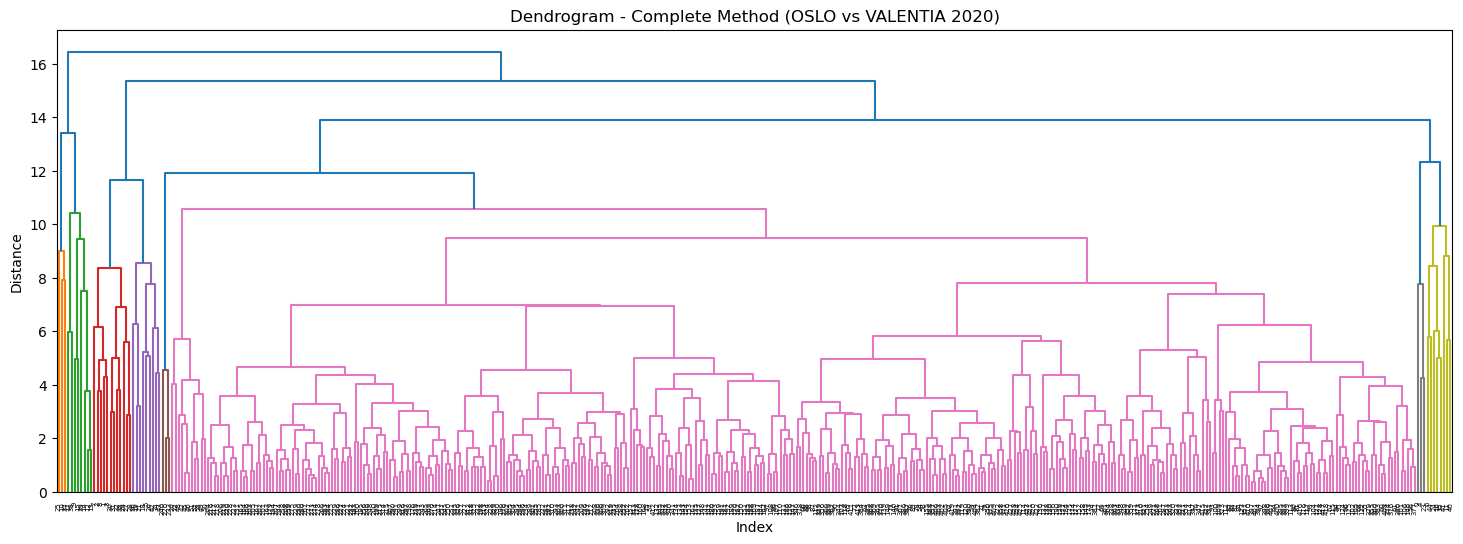

In [42]:
# Comparing only Oslo and Valentia in 2020 - complete method

distance = linkage(X, method='complete')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Complete Method (OSLO vs VALENTIA 2020)")

# Display the dendrogram
plt.show()

## Average method:
### This method evaluates the distance between the average values of members in each cluster to determine group affiliation. The average is calculated as the mean distance between all pairs of points from different clusters, aiding in the identification of clusters to be merged next.

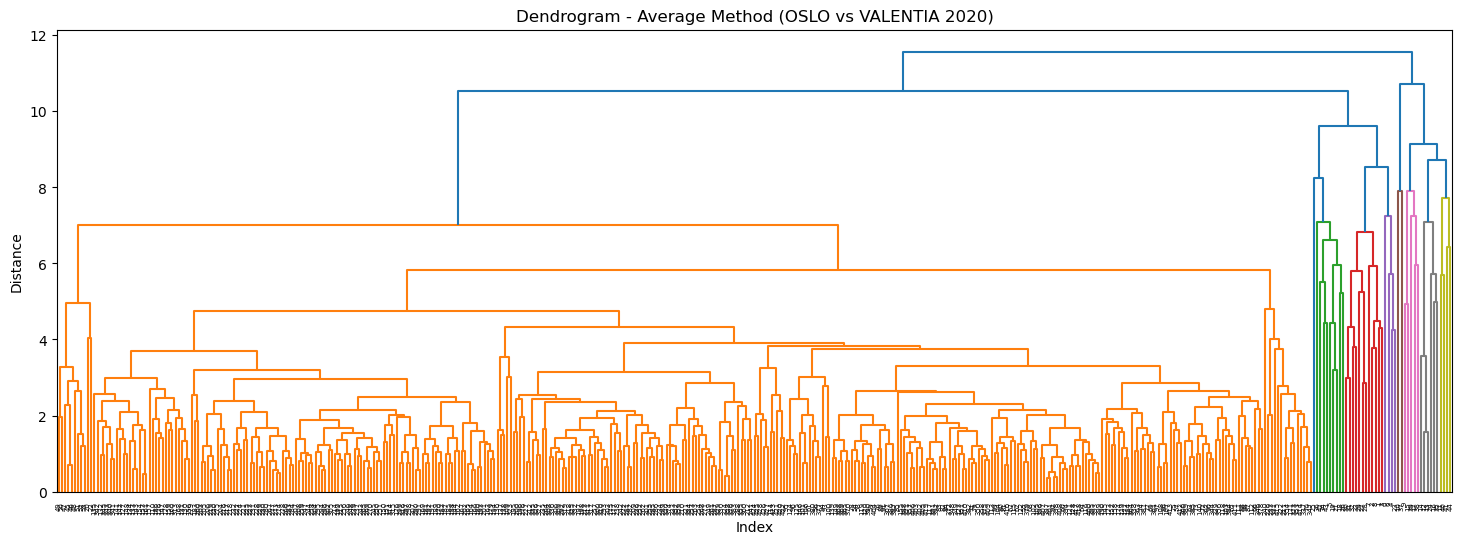

In [45]:
distance = linkage(X, method='average')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Average Method (OSLO vs VALENTIA 2020)")

# Display the dendrogram
plt.show()

## Ward method
### The variance between two clusters is minimized using MISSQ (minimum increase of sum of squares) to determine the distance between them. The Ward method evaluates the increase in total within-cluster variance (sum of squared differences) resulting from merging two clusters and selects the pair that produces the smallest increase.

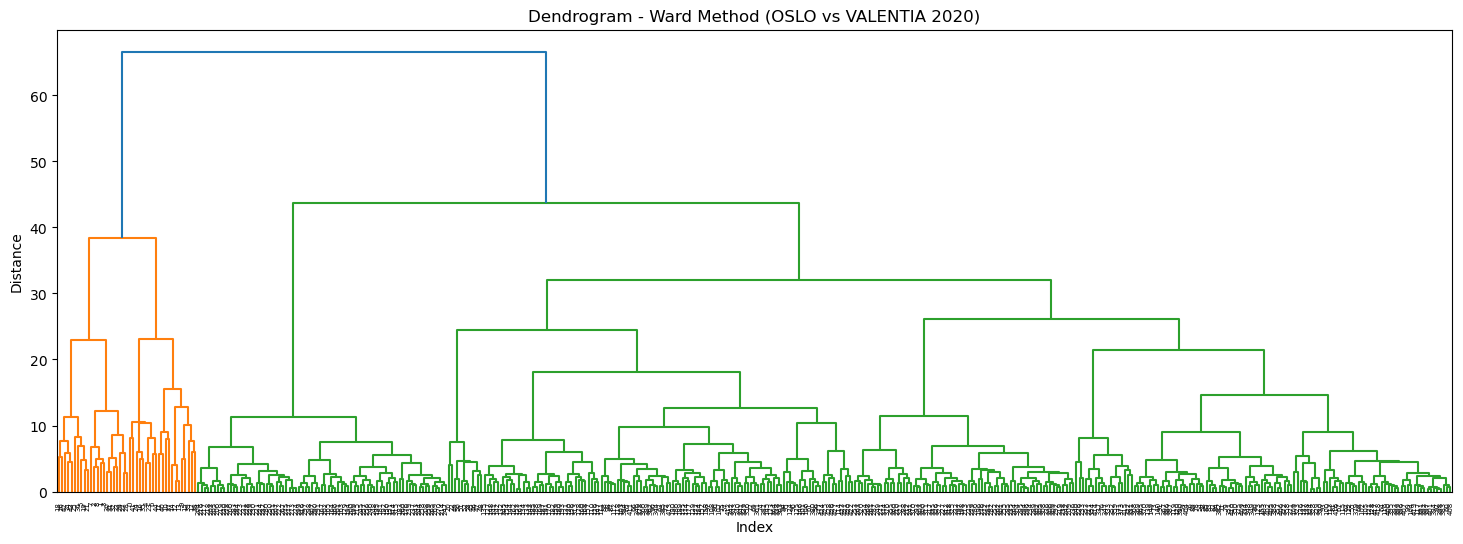

In [48]:
distance = linkage(X, method='ward')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Ward Method (OSLO vs VALENTIA 2020)")

# Display the dendrogram
plt.show()

### "ClimateWins wants to see how data is clustered..."
## Single Method ALL Stations

In [51]:
# Prepare the full dataset for clustering by removing DATE and MONTH

X_all_stations = scaled_2020.drop(columns=['DATE', 'MONTH'])

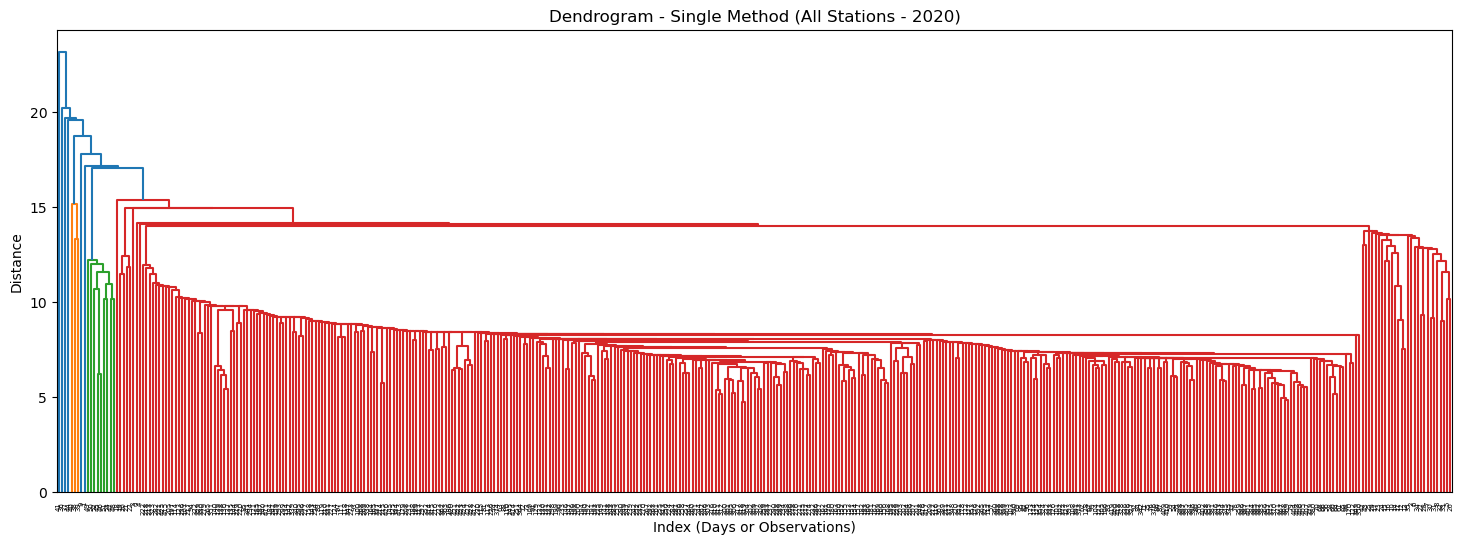

In [53]:
# Single linkage method for all stations
distance1 = linkage(X_all_stations, method='single')

plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Single Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

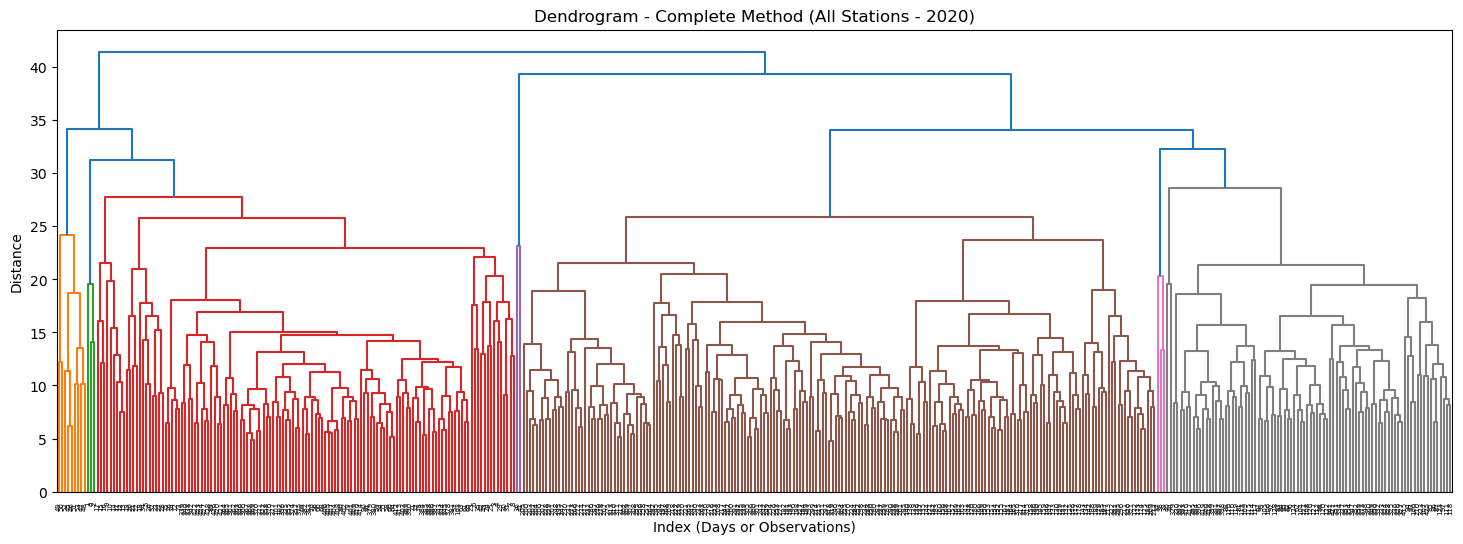

In [55]:
# Complete linkage method for all stations
distance1 = linkage(X_all_stations, method='complete')

plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Complete Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

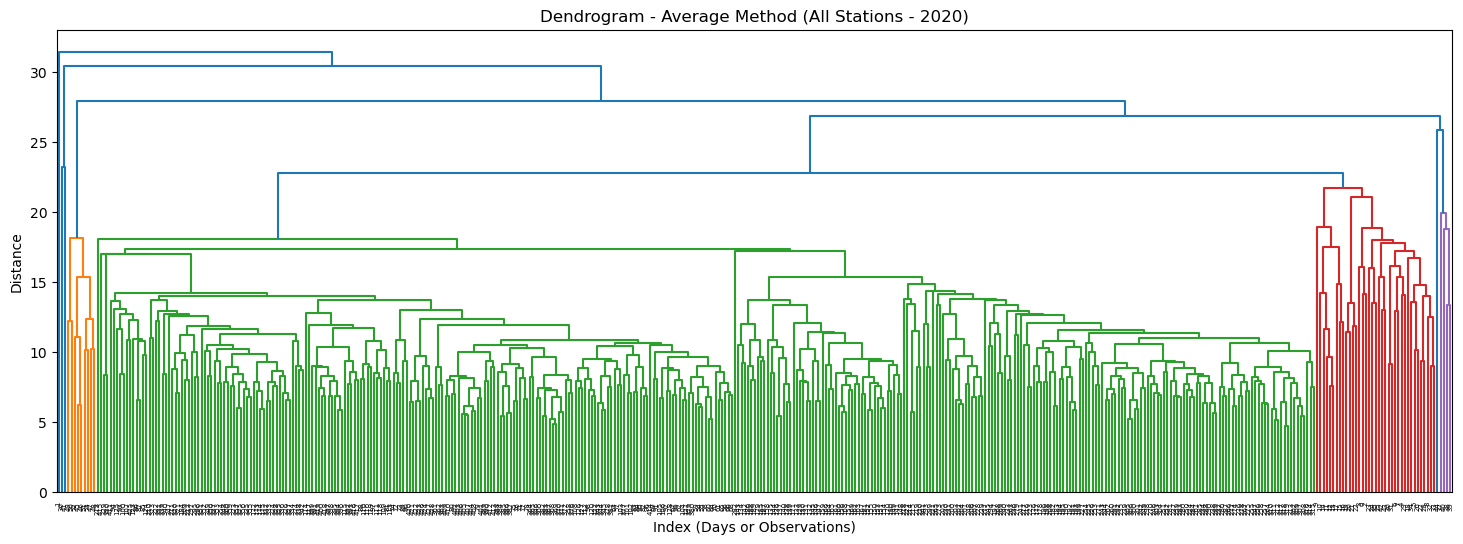

In [57]:
# Average linkage method for all stations
distance1 = linkage(X_all_stations, method='average')

plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Average Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

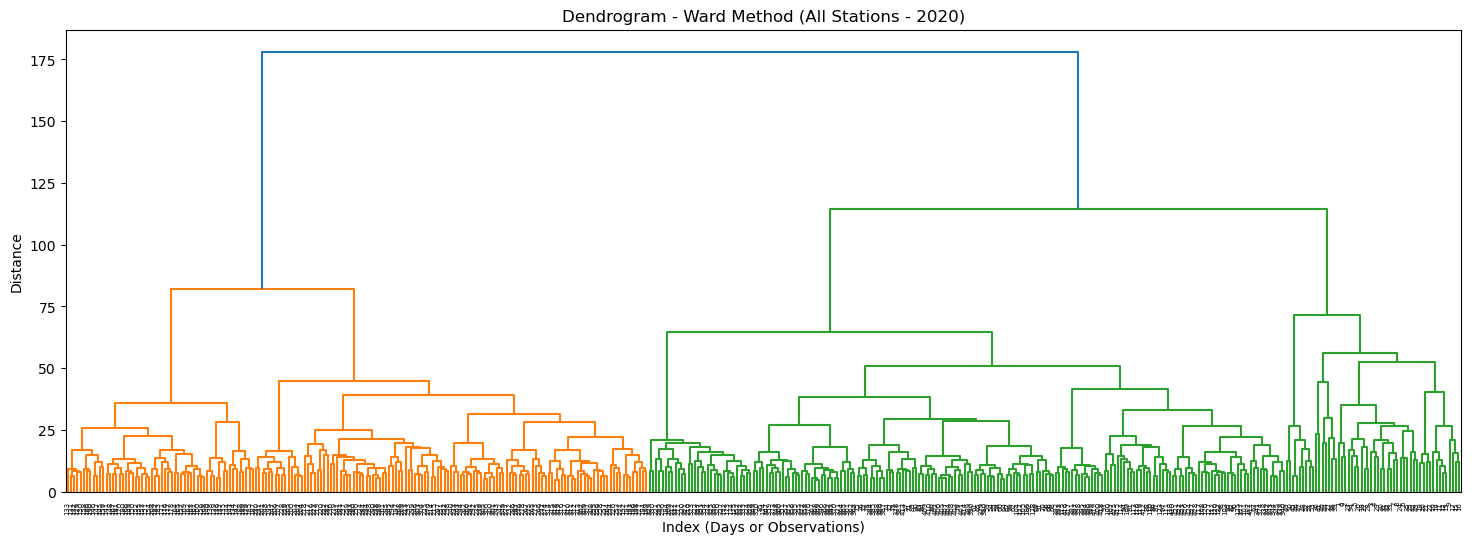

In [58]:
# Ward linkage method for all stations
distance1 = linkage(X_all_stations, method='ward')

plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Ward Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

### 4. Insights

**Single Linkage:**
Reveals weak, localized similarities between weather stations but produces long chaining clusters that do not reflect overall climate similarity.

**Complete Linkage:**
Highlights strong and clearly separated connections among weather stations, indicating consistent similarity across all weather variables.

**Average Linkage:**
Identifies moderate, region-level similarities by balancing local and global climate patterns among stations.

**Ward’s Method:**
Forms statistically compact clusters that minimize internal variance, making it effective for segmentation but less sensitive to subtle climate differences.


# **What is Learned from the Dendrograms (Oslo & Valentia – 2020)**

## **Oslo vs Valentia – 2020**

**Single Method:**
The data forms one long chain, making it difficult to identify meaningful groupings. This method does not clearly capture the strong climatic differences between Oslo and Valentia.

**Complete Method:**
This method shows clearer separation between Oslo and Valentia, reflecting differences in temperature, sunshine, and overall climate conditions between a colder northern station and a milder coastal station.

**Average Method:**
Two to three clusters emerge, likely capturing broad seasonal patterns, but the separation between the two stations is not very sharp.

**Ward Method:**
This method provides the clearest structure, grouping the days into three to four distinct clusters and clearly highlighting the contrasting climate patterns of Oslo and Valentia.


## **All Stations – 2020 (Oslo, Valentia, and Other Stations)**

**Single Method:**
Most stations are merged into one large chain, making it difficult to see meaningful differences between locations. This method does not clearly show how stations vary by climate.

**Complete Method:**
The data splits into four to five clusters, suggesting clear distinctions among stations based on factors such as temperature levels, coastal influence, and overall climate conditions.

**Average Method:**
Two to three broader groups emerge, capturing general weather trends across stations but missing smaller or more localized climate patterns.

**Ward Method:**
This method produces three clear and well-separated clusters, which likely correspond to real-world climate types such as colder northern stations, milder coastal stations, and intermediate inland climates.

## **Overall Takeaway**

1. Ward’s method offers the clearest and most interpretable clustering for Oslo and Valentia, effectively capturing their climate differences.

2. Single linkage is the least useful, as it groups too much of the data together and hides meaningful distinctions.

### 05 PCS (Principal Components Analysis)

#### PCA, or Principal Component Analysis, is used to shrink the dataset so it’s easier to handle, especially since ClimateWins has limited computing power. It works by spotting patterns in the data and combining similar features into a smaller set of “principal components” that keep the most important information. Instead of dealing with over 170 weather features from different stations, the data is reduced to just 10 components. These still capture key trends like temperature patterns or humidity differences, but without the extra detail that slows things down or repeats information. This keeps the important insights while speeding up clustering and letting ClimateWins focus on what really matters.

In [64]:
scaled_2020

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-4.299921,-1.079955,1.233924,-0.016609,0.254482,-0.110544,-1.066261,0.683224,-0.164936,-1.130323,...,1.357631,-3.565821,3.641242,-1.531766,-0.883780,0.0,0.515246,-4.019753,-2.954667,-4.010961
1,-4.299913,-1.079955,0.836511,-0.016609,0.919718,-0.110544,-0.848886,-0.177456,1.876143,-0.979120,...,4.593317,3.417003,3.469935,-3.120154,-0.588958,0.0,-3.912944,-2.466388,-1.696759,-2.774602
2,-4.299905,-1.079955,0.836511,-0.016609,0.845803,-0.110544,-0.620070,-0.482858,1.195783,-0.611912,...,2.975474,1.920684,2.023341,-2.345331,-0.638095,0.0,-3.051907,-1.988430,-1.277456,-2.362483
3,-4.299897,-1.079955,1.233924,-0.016609,1.215378,-0.110544,-1.054820,-0.038636,1.195783,-1.130323,...,4.593317,2.918230,0.767089,-3.236378,-1.080329,0.0,-3.912944,-1.510471,-1.067805,-1.435214
4,-4.299889,-1.079955,0.439099,-0.016609,0.328397,-0.110544,-0.974734,-0.455094,0.515424,-1.108723,...,2.975474,-2.069502,1.718795,-2.732743,-1.178603,0.0,-3.912944,-1.032513,0.085278,-2.053393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.484185,-1.079955,-0.753138,-0.016609,0.032736,0.974031,-0.219642,-0.482858,-0.164936,0.511312,...,-0.260213,-0.074409,0.100894,0.366551,-0.097587,0.0,0.269235,0.281873,0.190103,0.316295
425,0.484193,-1.079955,1.233924,-0.016609,-0.558585,0.127824,-0.997616,1.155209,-0.164936,-1.130323,...,-0.260213,-0.074409,0.100894,0.366551,-0.097587,0.0,0.269235,0.281873,0.190103,0.316295
426,0.484201,-1.079955,-1.150551,-0.016609,-0.484670,1.021704,-0.276846,-0.482858,-0.164936,0.187305,...,-0.260213,-0.074409,0.100894,0.366551,-0.097587,0.0,0.269235,0.281873,0.190103,0.316295
427,0.484209,-1.079955,-1.150551,-0.016609,-0.706415,1.903666,0.009174,-0.482858,-0.164936,0.770517,...,-0.260213,-0.074409,0.100894,0.366551,-0.097587,0.0,0.269235,0.281873,0.190103,0.316295


In [66]:
# Drop DATE and other non-feature columns
X = scaled_2020.drop(columns=['DATE', 'MONTH'], errors='ignore')

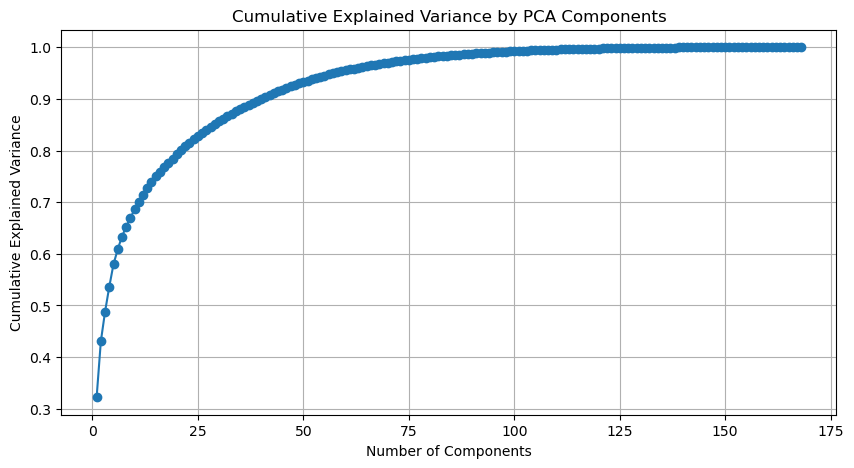

In [68]:
# Run PCA to reduce dimensionality
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot explained variance to decide how many components to keep
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

I chose 10 components because the elbow point in the cumulative explained variance plot is around this value. After 10 components, the curve flattens out, indicating that we’re capturing most of the key patterns in the data without retaining too many extra details that don’t add much value.

In [71]:
# Run the PCA model, reducing to 10 components 
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)

In [73]:
principalComponents

array([[-14.63693593,   2.44378695,  -6.58810919, ...,  -4.19339371,
          2.55488475,   0.80568107],
       [-14.47243367,   3.72831888,  -8.39709157, ...,  -7.05151556,
          4.88225369,   3.54730104],
       [-14.04480855,   2.11388916,  -7.23959257, ...,  -1.67418934,
          3.58185557,   0.82034939],
       ...,
       [ -3.66034554,   1.40623501,   2.89789513, ...,   0.45604729,
         -1.9834853 ,  -0.7845582 ],
       [ -3.83412344,   1.83491945,   1.8798999 , ...,   0.35392922,
         -2.32668283,  -1.30565147],
       [ -2.54551552,   1.93522311,   1.68606583, ...,  -0.63681888,
         -2.63118816,  -1.10324515]])

In [75]:
# Create DataFrame from PCA results with manually written column names
pca_df = pd.DataFrame(principalComponents, columns=[
    'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
    'PC6', 'PC7', 'PC8', 'PC9', 'PC10'
])

In [77]:
# Export to CSV
path = r"C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Machine Learning Specialization Course\Achievement 2\Data Sets\Unsupervised\Scripts"

pca_df.to_csv(os.path.join(path, 'Analytical Scripts', '2020_PCA.csv'), index=False)